<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/PytorchTutorial6_min_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[莫凡Pytorch教程（六）：Pytorch中的mini-batch和优化器](https://juejin.cn/post/7091084841856270367)

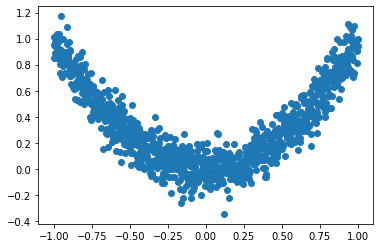

In [2]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go


LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(*x.size()))

# plot dataset with Matplotlib
plt.scatter(x.numpy(), y.numpy())
plt.show()

# plot dataset with Plotly
fig = px.scatter(y=y[:,0], x=x[:,0], width=500, height=400)
fig.show()


In [3]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset = torch_dataset,    # 要划分的数据集
    batch_size = BATCH_SIZE,    # 所设置的batch大小，一般2的次方倍会有助于快速计算
    shuffle = True,             # 是否打乱，打乱更有助于训练
    num_workers = 2,            # 所使用的线程数目
)

In [4]:
# default network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_prediction):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.prediction = torch.nn.Linear(n_hidden, n_prediction)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        y = self.prediction(x)
        return y

In [6]:
# different nets
net_SGD = Net(1, 20, 1)
net_Momentum = Net(1, 20, 1)
net_RMSprop = Net(1, 20, 1)
net_Adam = Net(1, 20, 1)

nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]


opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))

optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]


loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11


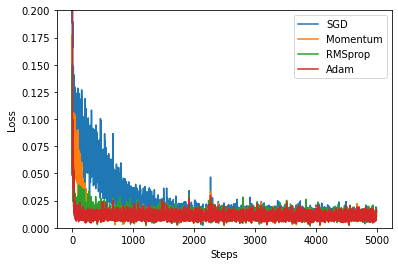

In [25]:
for epoch in range(EPOCH):
    print("epoch: ", epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        #b_x = Variable(batch_x)
        #b_y = Variable(batch_y)
        
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            #output = net(b_x)               # get output for every net
            #loss = loss_func(output, b_y)   # compute loss for every net
            output = net(batch_x)               # get output for every net
            loss = loss_func(output, batch_y)   # compute loss for every net

            opt.zero_grad()                 # clear gradients for next train
            loss.backward()                 # backpropagation, compute gradients
            opt.step()                      # apply gradients

            l_his.append(loss.data)      # loss recorder
            
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']

# Plot with Matplotlib
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

# Plot with Plotly
fig = go.Figure()
for i, l_his in enumerate(losses_his):
    fig.add_trace(go.Scatter(y=l_his, name=labels[i]))
fig.update_layout(
    xaxis=dict(title='Steps'),  
    yaxis=dict(title='Loss'),  
    legend=dict(yanchor='top', y=.98, xanchor="right", x=.99),
    margin=dict(l=20, r=20, t=20, b=20),
    #width=600, height=400
)
fig.show()